# My GMV ETF Portfolio

## Determine the optimal set of weights for my ETF universe.

### Read the available data

In [260]:
universe = [
    { 'isin': 'IE00BKM4GZ66',  'symbol': 'IS3N.F', 
      'name': 'iShares Core MSCI Emerging Markets IMI UCITS'},
    { 'isin': 'IE00BP3QZB59',  'symbol': 'IS3S.DE',
      'name': 'iShares MSCI World Value Factor UCITS'},
    { 'isin': 'IE00BF4RFH31',  'symbol': 'IUSN.F',
      'name': 'iShares MSCI World Small Cap UCITS USD Acc'},
    { 'isin': 'IE00BL25JP72',  'symbol': 'XDEM.DE',
      'name': 'db x-trackers MSCI World Mom Factor DR 1C'},
    { 'isin': 'IE00BL25JL35',  'symbol': 'XDEQ.DE',
      'name': 'db x-trackers MSCI World Quality Factor DR 1C' }
]

In [277]:
from scipy.optimize import minimize
from scipy.stats import norm
import scipy.stats
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plot 

import sys
sys.path.append("..")
import src.db_kit as dbk
import src.edhec_risk_kit as erk

In [371]:
names = [asset['isin'] for asset in universe]
returns = dbk.read_returns(names, dbk.engine)
returns.dropna(inplace=True)

AttributeError: module 'pandas' has no attribute 'get_data_yahoo'

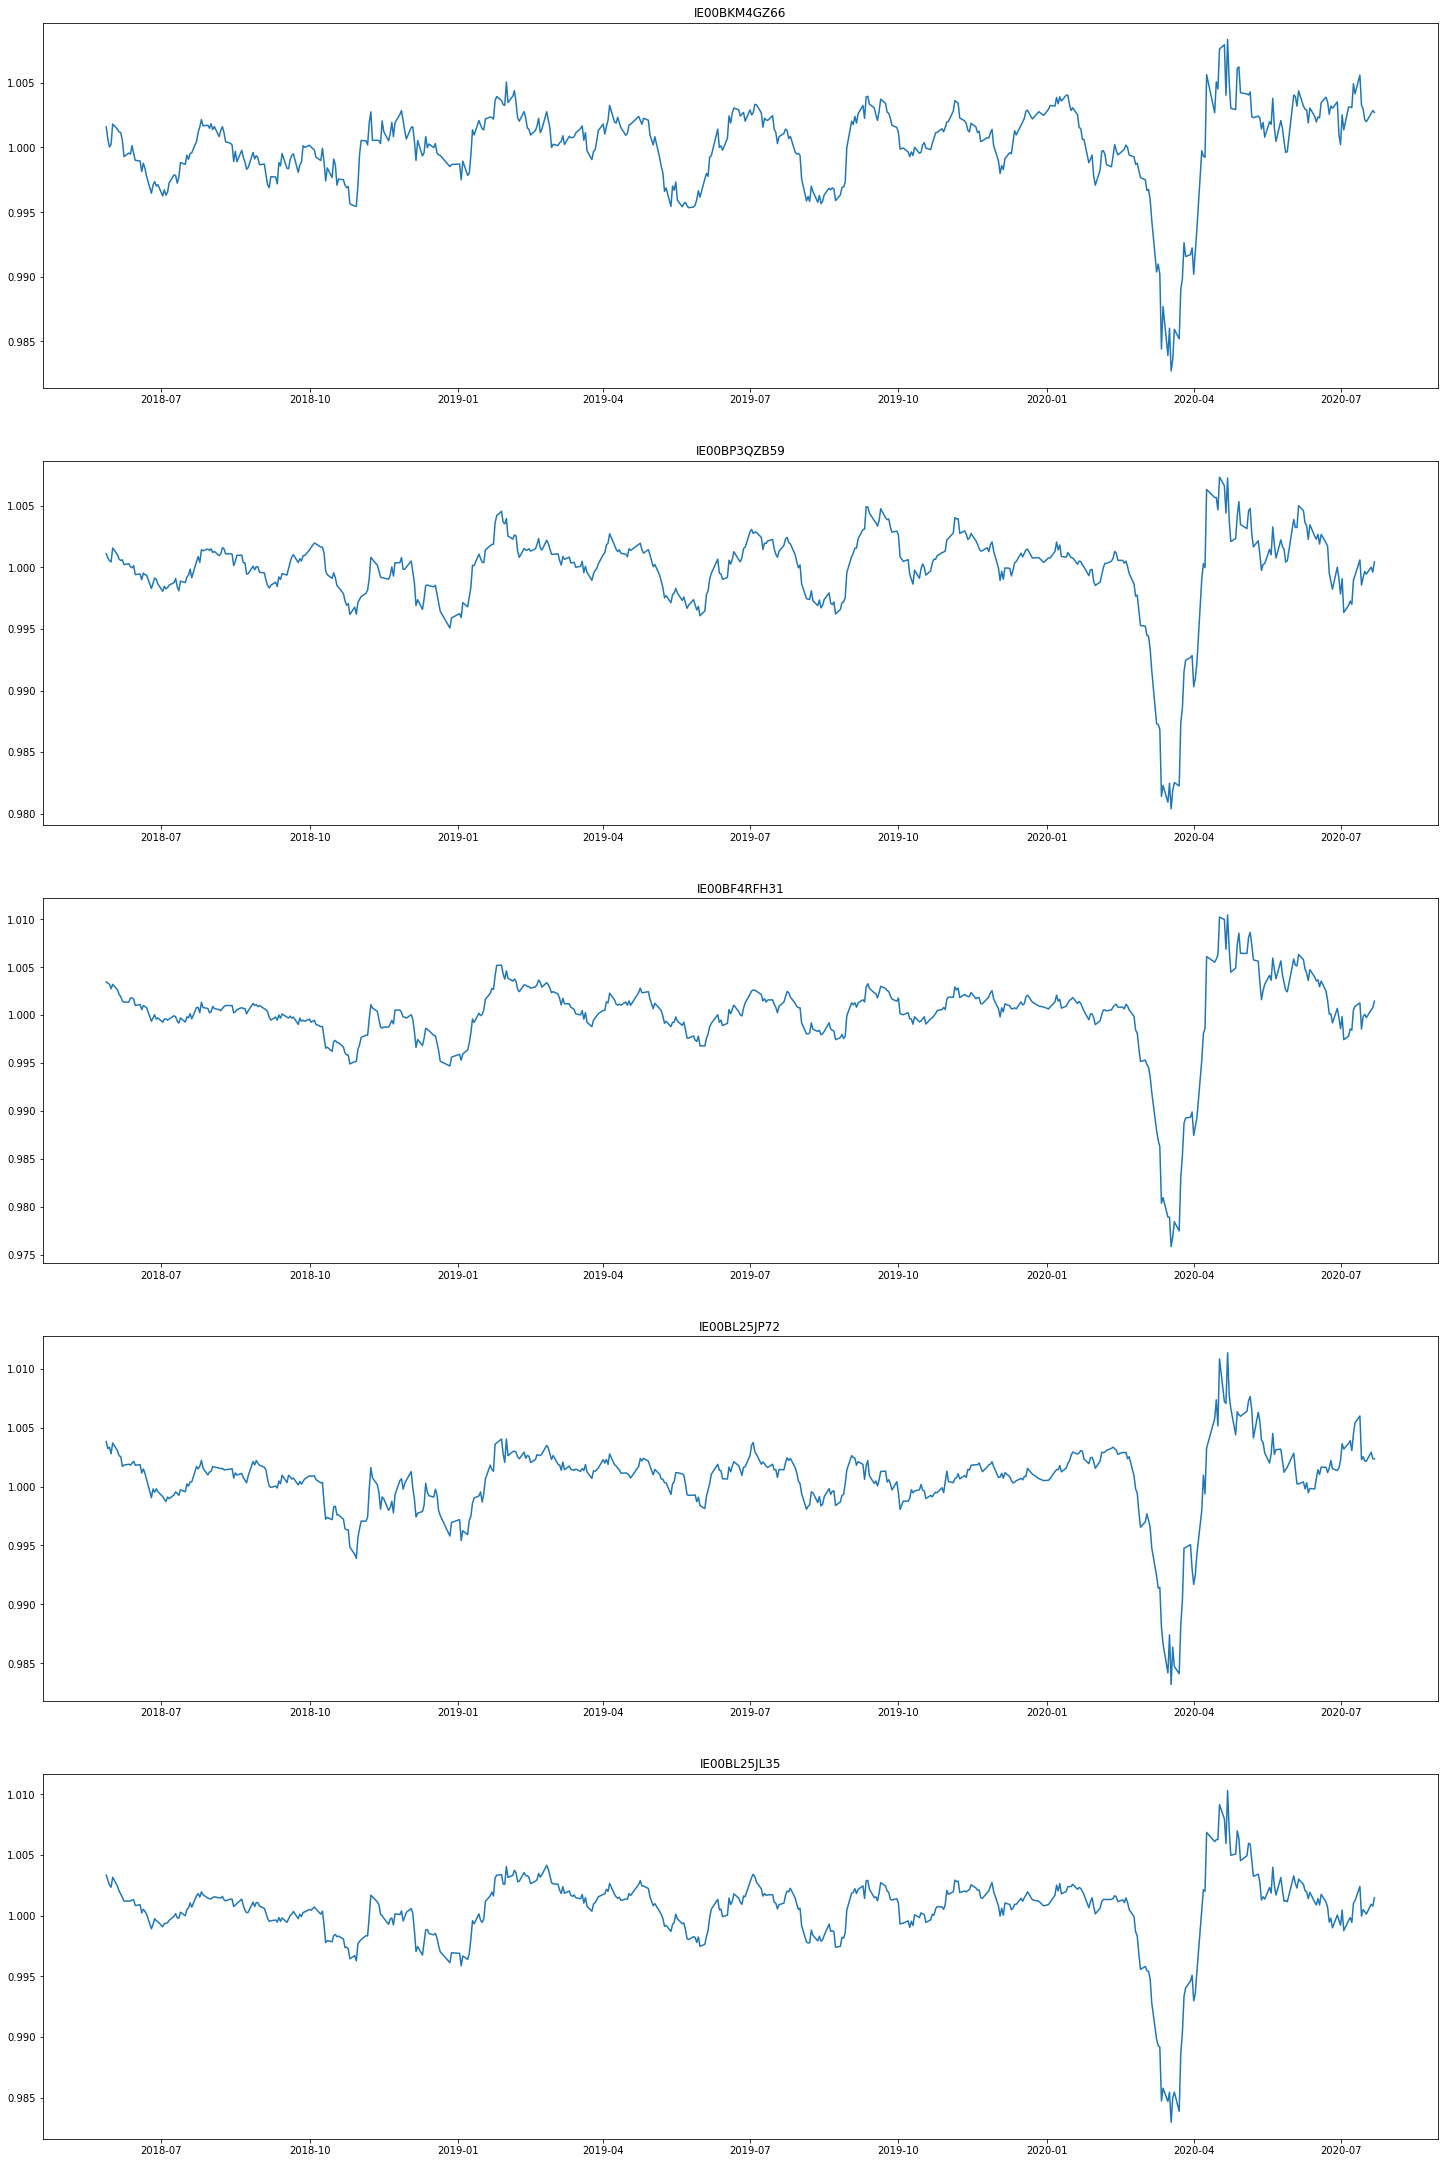

In [373]:
idx = 1
figure = plot.figure(figsize=(25,200))

for name in names:
    subplot = figure.add_subplot(25,1, idx)
    r = (1+returns[name]['2018':])
    subplot.set_title(name)
    subplot.plot(r)
    idx = idx+1

In [394]:
corr = returns.rolling(90, center=True).mean().corr()
corr.round(2)


,IE00BKM4GZ66,IE00BP3QZB59,IE00BF4RFH31,IE00BL25JP72,IE00BL25JL35
IE00BKM4GZ66,1.00,0.85,0.84,0.60,0.82
IE00BP3QZB59,0.85,1.00,0.94,0.67,0.90
IE00BF4RFH31,0.84,0.94,1.00,0.84,0.97
IE00BL25JP72,0.60,0.67,0.84,1.00,0.90
IE00BL25JL35,0.82,0.90,0.97,0.90,1.00


In [381]:
cov = returns.cov()
cov

,IE00BKM4GZ66,IE00BP3QZB59,IE00BF4RFH31,IE00BL25JP72,IE00BL25JL35
IE00BKM4GZ66,0.000231,0.000168,0.000174,0.000138,0.000155
IE00BP3QZB59,0.000168,0.000177,0.000176,0.000129,0.000150
IE00BF4RFH31,0.000174,0.000176,0.000198,0.000139,0.000159
IE00BL25JP72,0.000138,0.000129,0.000139,0.000176,0.000132
IE00BL25JL35,0.000155,0.000150,0.000159,0.000132,0.000145


In [384]:
gmv = erk.gmv(cov.round(10))
gmv

array([3.12516720e-16, 1.72257178e-14, 0.00000000e+00, 2.36817896e-01,
       7.63182104e-01])

In [265]:
er = erk.annualize_rets(returns, 252)
er

IE00BKM4GZ66    0.009859
IE00BP3QZB59   -0.053683
IE00BF4RFH31    0.011578
IE00BL25JP72    0.158912
IE00BL25JL35    0.111254
dtype: float64

In [268]:
msr = erk.msr(0, er.values, cov)
msr.round(2)

array([0., 0., 0., 1., 0.])

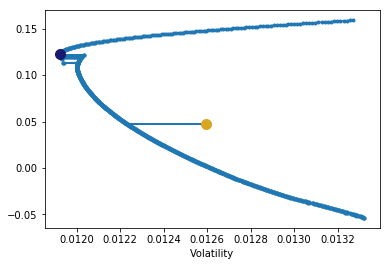

In [356]:
erk.plot_ef(1000, er.values, cov, show_gmv=True, show_ew=True)